In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")

from graph import get_ba, get_er, get_rr
from graph.utils import get_edge_list
from rossler.plot import plot
from rossler.simulation import argument
from rossler.simulation.solve import solve
from neural_rk.path import FIG_DIR

In [2]:
args = argument.get_args(
    [
        "--network_type", "rr",
        "--num_nodes", "20",
        "--a", "0.2",
        "--b", "0.2",
        "--c", "6.0",
        "--coupling", "0.03",
        "--max_time", "40.0",
        "--steps", "400",
        "--num_samples", "1",
        "--seed", "0",
        "--solver", "rk1",
    ]
)

In [3]:
rng = np.random.default_rng(args.seed)

# Graph setting
network_type = argument.get_network_type(args.network_type, rng)
num_nodes = argument.get_num_nodes(args.num_nodes, rng)
mean_degree = argument.get_mean_degree(args.mean_degree, rng)

if network_type == "er":
    graph = get_er(num_nodes, mean_degree, rng=rng)
elif network_type == "ba":
    graph = get_ba(num_nodes, mean_degree, rng=rng)
else:
    graph = get_rr(num_nodes, mean_degree, rng=rng)

# Since only gcc is selected, the graph can have smaller num_nodes
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
edge_list = get_edge_list(graph)

dts = argument.get_dt(
    args.max_time, args.steps, args.dt_delta, tuple(args.dt_clip), rng
)
time = np.insert(np.cumsum(dts), 0, 0.0)

# params(params, coupling) setting
params = argument.get_params(args.a, args.b, args.c, rng)
coupling = argument.get_coupling(num_edges, args.coupling, rng)

# Initial condition setting
initial_position = argument.get_initial_condition(num_nodes, rng)


In [4]:
positions = solve(
    args.solver, graph, coupling, initial_position, dts, params
)

# Plot

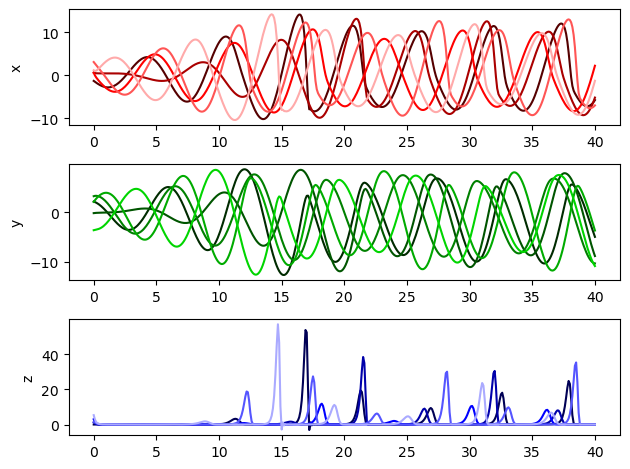

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)

plot(ax1, ax2, ax3, positions, time, 5)


fig.tight_layout()
fig.savefig(str(FIG_DIR / "rossler_example.png"))